# Import required libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Read Data

In [33]:
data = pd.read_csv('/Users/gumber/Documents/Personal_Repository/AI-DataScience-Course/ML/data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Correlation Check

In [34]:
correlations = data.corr()
correlations
# No independent variable is correlated

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Visulazing the data for any Relations

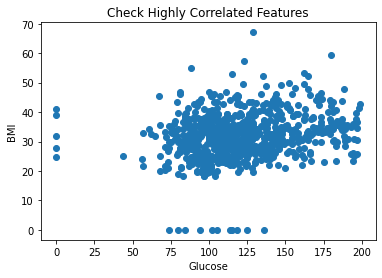

In [35]:
def visualise(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
    ax.set_title("Check Highly Correlated Features")
    ax.set_xlabel("Glucose")
    ax.set_ylabel("BMI")
visualise(data)

# Checking for null values and Replacing them

In [36]:
data.isnull().sum()
# no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
data[data['Glucose']==0].count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [38]:
data[['BMI', 'Glucose']] = data[['BMI', 'Glucose']].replace(0, np.NaN)
data.dropna(inplace=True)

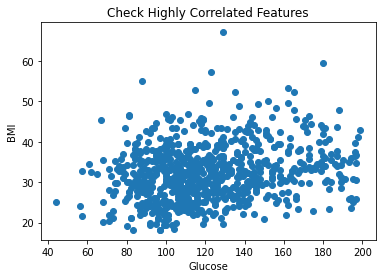

In [39]:
visualise(data)

# Feature Selection

In [41]:
X = data.drop(['Outcome'], axis=1).values
y = data['Outcome'].values

# Standardize and Scaling of Features

In [42]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [44]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [56]:
# Mean and standard deviation after standardizing - mean should be zero and standard deviation should be 1
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard Deviation: (%d, %d)' %(standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard Deviation: (1, 1)


In [57]:
print(X[0:10,:])

[[ 0.63710986  0.85211873  0.1253525   0.89727837 -0.70219989  0.16540919
   0.46667123  1.42608616]
 [-0.84527447 -1.2079944  -0.20233607  0.52039138 -0.70219989 -0.84552075
  -0.36997511 -0.19762243]
 [ 1.2300636   1.99662603 -0.31156559 -1.30122904 -0.70219989 -1.322102
   0.60308096 -0.11216408]
 [-0.84527447 -1.07719357 -0.20233607  0.1435044   0.10920865 -0.62889291
  -0.92773934 -1.05220589]
 [-1.14175134  0.49241644 -1.62231987  0.89727837  0.74797707  1.53738552
   5.5017059  -0.02670573]
 [ 0.340633   -0.19428794  0.23458202 -1.30122904 -0.70219989 -0.98993931
  -0.82467421 -0.28308077]
 [-0.25232074 -1.43689586 -1.07617225  0.70883487  0.05741661 -0.21007908
  -0.68220183 -0.62491416]
 [ 1.82301733 -0.22698815 -3.80691032 -1.30122904 -0.70219989  0.41092074
  -1.02777314 -0.36853912]
 [-0.5487976   2.45442895  0.01612297  1.52542334  3.98497922 -0.28228836
  -0.95502128  1.6824612 ]
 [ 0.04415613 -0.39048919  1.21764772 -1.30122904 -0.70219989  0.74308343
  -0.85498748 -0.28

# Train Test Split

In [59]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Using Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Predictions

In [63]:
y_pred = logreg.predict(X_test)

In [64]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

# Performance & Accuracy

In [66]:
cnf_metrics = metrics.confusion_matrix(y_test, y_pred)
cnf_metrics

array([[81, 10],
       [24, 36]])

Text(0.5, 257.44, 'Predicted label')

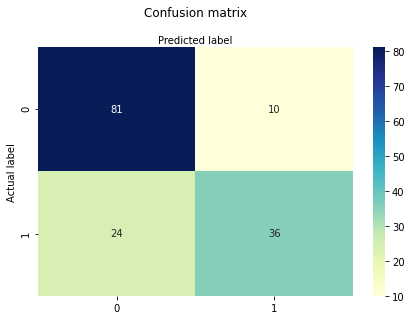

In [68]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_metrics), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [72]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.7748344370860927
Precision:  0.782608695652174
Recall:  0.6


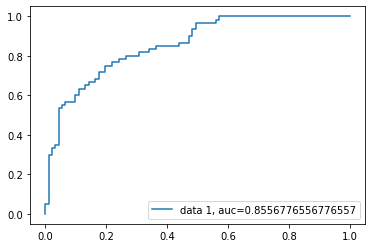

In [87]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()